In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ztfrapid import ztf_rapid

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [2]:
lc_data_path = '/home/nmiranda/workspace/ztf_rapid/data/raw/rcf_marshallc_sncosmo_200114_2018classupdate_addedcv.pkl'

In [3]:
lc_data = pd.read_pickle(lc_data_path)

In [4]:
len(lc_data)

4578

In [5]:
# this_id = list(lc_data.keys())[0]
this_id = 'ZTF19aanfyey'
this_lc = lc_data[this_id]
# this_lc = ztf_rapid.filter_pps(this_lc)

In [6]:
this_lc

mjd,band,flux,fluxerr,zp,zpsys
float64,str4,float64,float64,float64,str2
58538.245600000024,p48r,0.0,107.90212450302536,25.0,ab
58538.29570000013,p48g,0.0,50.23772863019165,25.0,ab
58540.25499999989,p48r,0.0,12.503453855513698,25.0,ab
58541.26970000006,p48g,0.0,18.579327735598763,25.0,ab
58546.27339999983,p48g,0.0,11.092514259158209,25.0,ab
58556.370699999854,p48g,0.0,20.0,25.0,ab
58558.20740000019,p48r,0.0,27.60768529205773,25.0,ab
58559.248399999924,p48r,0.0,25.88391682899975,25.0,ab
58559.25320000015,p48r,0.0,24.045288692348237,25.0,ab


In [7]:
pbmask = this_lc['band'] == 'p48r'
this_lc[pbmask]

mjd,band,flux,fluxerr,zp,zpsys
float64,str4,float64,float64,float64,str2
58538.245600000024,p48r,0.0,107.90212450302536,25.0,ab
58540.25499999989,p48r,0.0,12.503453855513698,25.0,ab
58558.20740000019,p48r,0.0,27.60768529205773,25.0,ab
58559.248399999924,p48r,0.0,25.88391682899975,25.0,ab
58559.25320000015,p48r,0.0,24.045288692348237,25.0,ab
58567.233800000045,p48r,157.036280433355,18.802648716023942,25.0,ab
58572.2760999999,p48r,319.15378551007683,38.21369494218234,25.0,ab
58574.21810000017,p48r,0.0,139.64648081543424,25.0,ab
58575.228300000075,p48r,390.8408957924025,61.19622058611372,25.0,ab


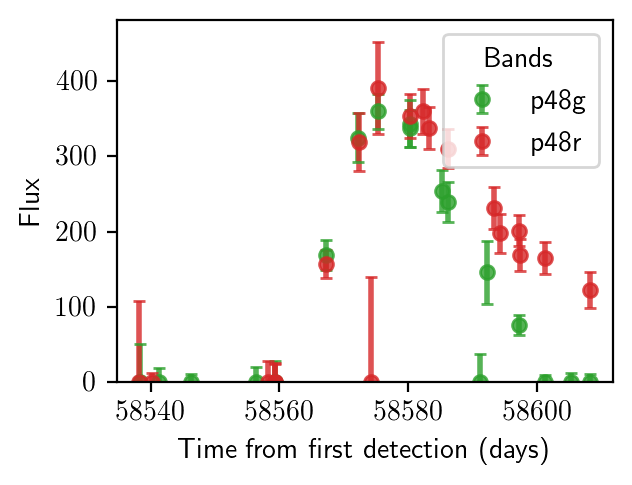

In [8]:
fig = plt.figure(figsize=(3.2, 2.4), dpi=200)

for pbidx, pb in enumerate(ztf_rapid.BANDS.keys()):
    if pb not in set(this_lc['band']):
        continue
    pbmask = this_lc['band'] == pb
    plt.errorbar(
        this_lc[pbmask]['mjd'],
        this_lc[pbmask]['flux'],
        yerr=this_lc[pbmask]['fluxerr'],
        fmt='o',
        label = pb,
        lw=2,
        markersize=5,
        alpha=0.8,
        capsize=2.0,
        c=ztf_rapid.COLPB_ZTF[pb]
    )

plt.ylim(bottom=0.0)
plt.ylabel('Flux')
plt.xlabel('Time from first detection (days)')
plt.legend(loc='upper right', title='Bands')